# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
#Observations
#Mice taking the Capomulin treatment saw a substantial decrease in Tumor Volume.  Assuming all other factors are neutral, we can reasonbly infer the treatment was successful in reducing tumor volume as compared to other treatments
#Capomulin is similar in effectiveness level to Ramicane
#It takes around 20 days for Capomulin to start having an observable effect
#The more the mouse weighs, the greater the size of the tumor

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how ="right")

# Display the data table for preview
data = data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", 'Metastatic Sites','Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(data["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicates = data[data.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mouse_ids = data.loc[data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = data.loc[data['Mouse ID']=='g989']
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_cleaned = data.drop(duplicate_id.index, inplace = False)
data_cleaned.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_c = len(data_cleaned["Mouse ID"].unique())
mice_c

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stats = data_cleaned.drop(columns = ["Mouse ID", "Timepoint", 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)'], inplace= False)

stats_mean = stats.groupby('Drug Regimen').mean()
stats_mean = stats_mean.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})

stats_median = stats.groupby('Drug Regimen').median()
stats_median = stats_median.rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})

stats_var = stats.groupby('Drug Regimen').var()
stats_var = stats_var.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})

stats_std_dev = stats.groupby('Drug Regimen').std()
stats_std_dev = stats_std_dev.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'})

stats_std_err = stats.groupby('Drug Regimen').sem()
stats_std_err = stats_std_err.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Err'})


drug_stats = pd.merge(stats_mean, stats_median, on = 'Drug Regimen', how = 'inner')
drug_stats = pd.merge(drug_stats, stats_var, on = 'Drug Regimen', how = 'inner')
drug_stats = pd.merge(drug_stats, stats_std_dev, on = 'Drug Regimen', how = 'inner')
drug_stats = pd.merge(drug_stats, stats_std_err, on = 'Drug Regimen', how = 'inner')
drug_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#stats = data_cleaned.loc['Drug Regimen', 'Tumor Volume (mm3)']
#stats

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

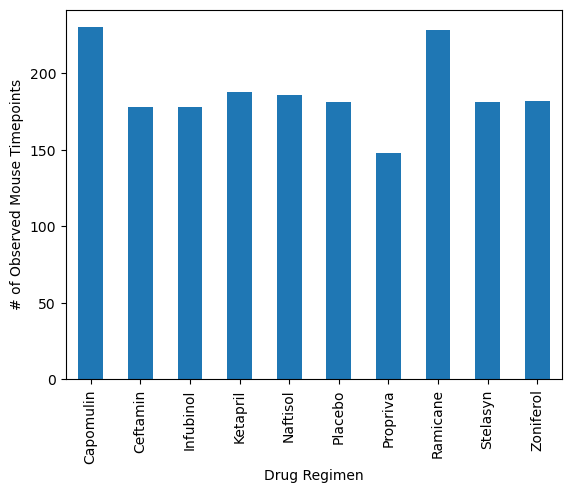

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


barplt = data_cleaned.groupby('Drug Regimen').count()['Timepoint'].plot(kind = 'bar',  xlabel = 'Drug Regimen', ylabel = '# of Observed Mouse Timepoints')
barplt


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

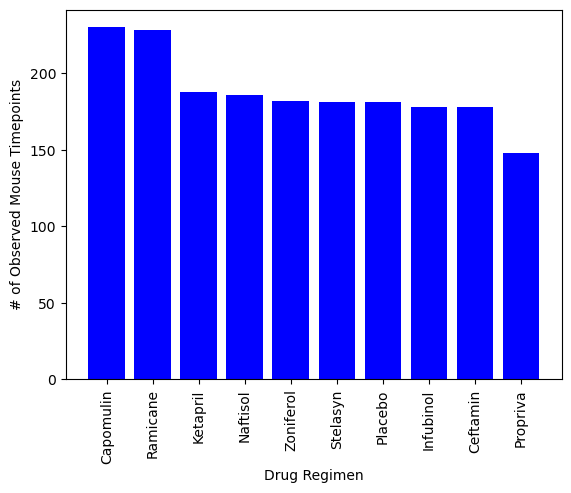

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
value_counts = data_cleaned['Drug Regimen'].value_counts(ascending=False)

plt.bar(value_counts.index, value_counts.values, color = 'b', align='center')
#plt.bar(data_cleaned['Drug Regimen'].unique(), data_cleaned.groupby('Drug Regimen')['Timepoint'].count(), color = 'b', align='center')
plt.xlabel("Drug Regimen")
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')

<Axes: ylabel='Sex'>

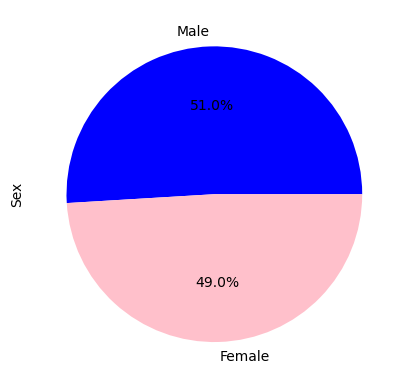

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_cleaned['Sex'].value_counts().plot.pie(colors=['b', 'pink'],
        autopct="%1.1f%%", startangle=0, ylabel='Sex')

([<matplotlib.patches.Wedge at 0x194a95238b0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

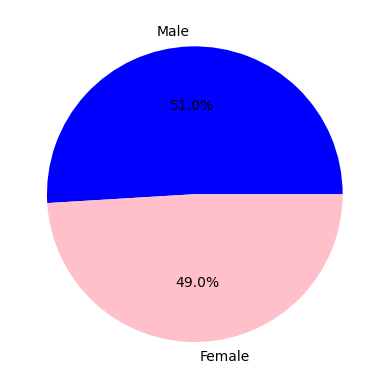

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_counts = data_cleaned['Sex'].value_counts()
labels = sex_counts.index.tolist()
colors = ['b', 'pink']




plt.pie(sex_counts, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=0,)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#other attempts
#greatest_timepoint = data_cleaned.loc[(data_cleaned['Drug Regimen'] == 'Capomulin') | (data_cleaned['Drug Regimen'] == 'Ramicane') | (data_cleaned['Drug Regimen'] == 'Infubinol') | (data_cleaned['Drug Regimen'] == 'Ceftamin')]
#condition = data_cleaned['Timepoint'] == 45
#greatest_timepoint = greatest_timepoint[condition]
#greatest_timepoint = data_cleaned.groupby('Drug Regimen')[data_cleaned['Timepoint'].max()]

greatest_timepoint = data_cleaned[data_cleaned['Timepoint'] == data_cleaned.groupby('Mouse ID')['Timepoint'].transform('max')]



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(greatest_timepoint, data_cleaned)
merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")



#tumor_vol_data

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\kklos\AppData\Local\Temp\ipykernel_14244\2915690512.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


{'whiskers': [<matplotlib.lines.Line2D at 0x194a97199f0>,
 'caps': [<matplotlib.lines.Line2D at 0x194a9719f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x194a97188e0>,
 'medians': [<matplotlib.lines.Line2D at 0x194a971a4a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x194a971a740>,
 'means': []}

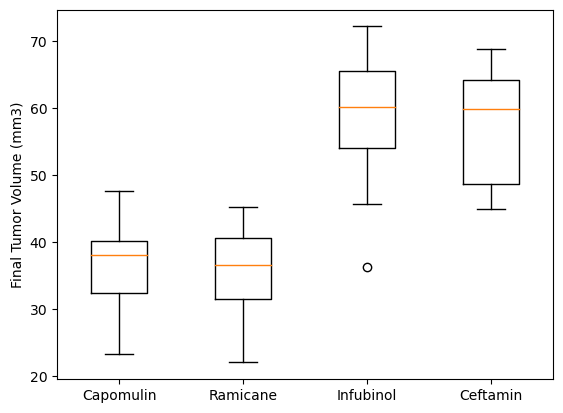

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_xticklabels(treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

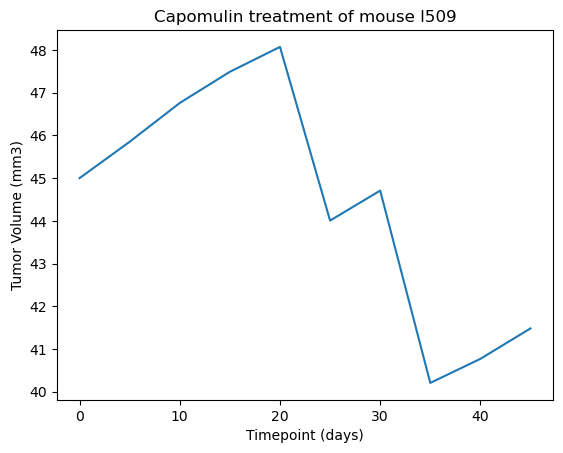

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_value = data_cleaned.loc[data_cleaned['Mouse ID'] == 'l509']
y_value = data_cleaned.loc[data_cleaned['Mouse ID'] == 'l509']
title = ('Capomulin treatment of mouse l509')

plt.plot(x_value['Timepoint'], y_value['Tumor Volume (mm3)'],)
plt.title(title)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Tumor Volume (mm3)')

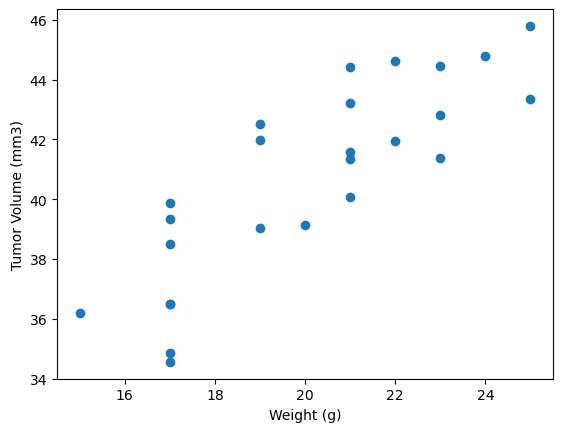

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = data_cleaned.loc[data_cleaned['Drug Regimen'] == 'Capomulin']
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average ['Weight (g)'], capomulin_average ['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


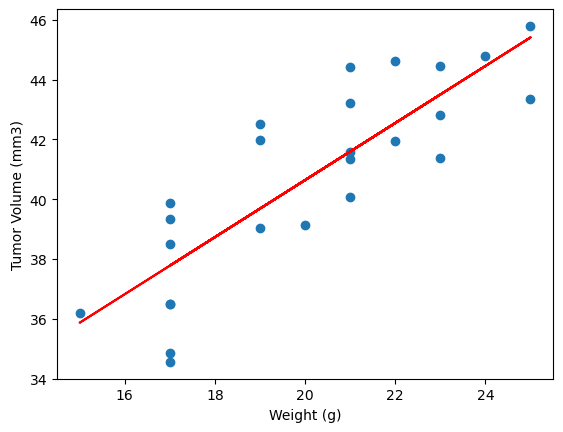

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_value_wt = capomulin_average['Weight (g)']
y_value_wt = capomulin_average['Tumor Volume (mm3)']

correlation_co = st.pearsonr(x_value_wt, y_value_wt)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation_co[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_wt, y_value_wt)
regress_values = x_value_wt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_wt,y_value_wt)
plt.plot(x_value_wt,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()